### Difference between python_speech_features and librosa library

-    https://zhuanlan.zhihu.com/p/57004884

# **Visualization of FBANK pre-processing method**

1.   Amplitude Scale Audio
2.   Pre-Emphasis 0.97
3.   Hamming Windowing
4.   Fourier Transform
5.   Mel Filterbank
6.   Apply Log Function


In [1]:
from time import sleep

import pickle
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm

from python_speech_features import logfbank, fbank
from python_speech_features import delta


# Library for performing speech recognition
# Python 2.6, 2.7, or 3.3+ (required)
# PyAudio 0.2.11+ (required only if you need to use microphone input, Microphone)
# More : https://github.com/Uberi/speech_recognition
import speech_recognition as sr 


Checking librosa version and speech_recognition version

In [2]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", sr.__version__)
save_path = "./test_train_data/"

librosa version :  0.7.2
speech_recognition version :  3.8.1


## Recording Speech

 Creates a new ``Recognizer`` instance, which represents a collection of speech recognition functionality.

In [3]:
 """
 Creates a new ``Recognizer`` instance, which represents a collection of speech recognition functionality.
 """
r = sr.Recognizer() 


print("음성 데이터 녹음")
file_name = str(input("이름을 입력하세요 : "))


음성 데이터 녹음
이름을 입력하세요 : kimsubin


Print a list of connected microphones

In [5]:
    list_0 =sr.Microphone.list_microphone_names()
    for i in range(0, len(list_0)-1):
        print(list_0[i])

HDA Intel PCH: ALC892 Analog (hw:0,0)
HDA Intel PCH: ALC892 Digital (hw:0,1)
HDA Intel PCH: ALC892 Alt Analog (hw:0,2)
HDA NVidia: HDMI 0 (hw:1,3)
HDA NVidia: HDMI 1 (hw:1,7)
HDA NVidia: HDMI 2 (hw:1,8)
HDA NVidia: HDMI 3 (hw:1,9)
sysdefault
front
surround21
surround40
surround41
surround50
surround51
surround71
iec958
spdif
pulse
dmix


Speech recording and save as WAV file

In [6]:
# Higher sample_rate result in better audio quality, slower recognition
# Higher chunk_size help avoid triggering on rapidly changing ambient noise,
#  but also makes detection less sensitive
microphone = sr.Microphone(device_index=7, sample_rate=None, chunk_size=1024)

In [7]:
 with microphone as source:
    print("15초 동안 녹음을 시작합니다.")
    print("녹음이 시작되면 다음 문장을 읽어주세요.\n")
        
    print("죽는 날까지 하늘을 우러러\n한 점 부끄러움이 없기를 \
        \n잎새에 이는 바람에도 \n나는 괴로워했다.\n별을 노래하는 마음으로 \
        \n모든 죽어가는 것을 사랑해야지\n그리고 나한테 주어진 길을\n걸어가야겠다")
        
    sleep(4)
        
        
    print("*****   녹음 시작   *****\n")
        
    # This method reads the first second of the file stream 
    # and calibrates the recognizer to the noise level of the audio.
    # adjust_for_ambient_noise는 첫 번째 초에 해당하는 오디오를 듣고 노이즈를 교정하는 메소드
    r.adjust_for_ambient_noise(source, duration=1)
        
    '''
    !! adjust_for_ambient_noise를 사용하면 첫 번째 초를 잃게 됨. -> sleep(4)인 이유
    !! 오디오의 1초는 노이즈 레벨을 판단하는 요소 : duration 으로 조정 가능, 가능한 0.5초 이상인게 좋다.
    !! durations longer than the default of one second generate better results.
    !! durations의 최솟값은 마이크의 주변 환경에 따라 다름.
    '''
        
    # This method takes an audio source as its first argument and
    # records input from the source until silence is detected.
    # microphone의 입력을 감지, 무음이 감지될 때까지 소스의 입력을 기록한다. -> 종료되는 오류의 원인일 가능성    
    audio = r.listen(source , phrase_time_limit=15)
        
    # audio는 AudioData(frame_data, source.SAMPLE_RATE, source.SAMPLE_WIDTH)
        
        
    print(" 녹음 완료. ")
        
        
    # Audio file 저장
    save_path = "./test_train_data/"
        
    if not os.path.exists(save_path + file_name):
        os.makedirs(save_path + file_name)
        result_name = file_name +"_"+str(0)
    else :
        files = os.listdir(save_path + file_name)
        result_name = file_name +"_"+str(len(files))
        
    with open(save_path + file_name + "/" + result_name+".wav", "wb") as f:
        f.write(audio.get_wav_data()) # AudioData to .wav
        print("''"+result_name + "' File Write Finish !")
            
    print(" Saved File Name : "+result_name)

15초 동안 녹음을 시작합니다.
녹음이 시작되면 다음 문장을 읽어주세요.

죽는 날까지 하늘을 우러러
한 점 부끄러움이 없기를        
잎새에 이는 바람에도 
나는 괴로워했다.
별을 노래하는 마음으로        
모든 죽어가는 것을 사랑해야지
그리고 나한테 주어진 길을
걸어가야겠다
*****   녹음 시작   *****

 녹음 완료. 
''kimsubin_3' File Write Finish !
 Saved File Name : kimsubin_3


#### Select WAV file

In [4]:
user_list = os.listdir(save_path)
user_list.sort()

print("User List :")
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

selUserNum = int(input("\n유저 번호를 선택하세요 : "))

file_list = os.listdir(save_path + str(user_list[selUserNum]+"/"))
file_list.sort()

print("\nFile List : ")
for i, item in zip(range(len(file_list)), file_list):
    print('[{:d}] '.format(i)+item)
    
selFileNum = int(input("\n파일 번호를 선택하세요 : "))

final_file_name = save_path + str(user_list[selUserNum]) +"/"+ str(file_list[selFileNum])

User List :
[0] juheon
[1] kimsubin

유저 번호를 선택하세요 : 1

File List : 
[0] kimsubin_0.wav
[1] kimsubin_1.wav
[2] kimsubin_2.wav
[3] kimsubin_3.wav
[4] kimsubin_4.wav
[5] kimsubin_5.wav
[6] kimsubin_6.wav

파일 번호를 선택하세요 : 6


In [5]:
'''
 y: loads and decodes the audio as a time series (one-dimensional NumPy floating point array)
 sr : the sampling rate of y, that is, the number of samples per second of audio
         
 mono=True : 스테레오 타입이면 모노 타입으로 변경 (convert signal to mono)
 duration : only load up to this much audio (in seconds)
'''
        
y, sr = librosa.load(final_file_name, sr=16000, mono=True, duration=15)


## Visualization Amplitude Scale Audio Signal

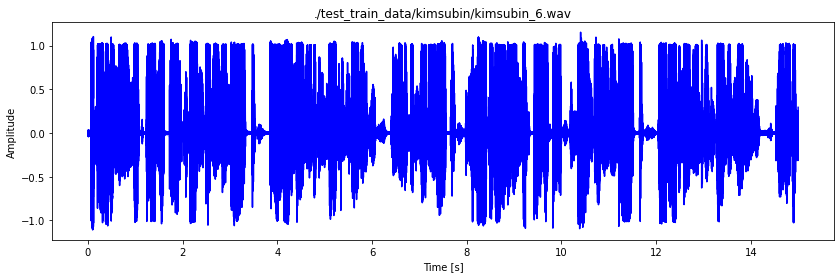

In [7]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(final_file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.show()

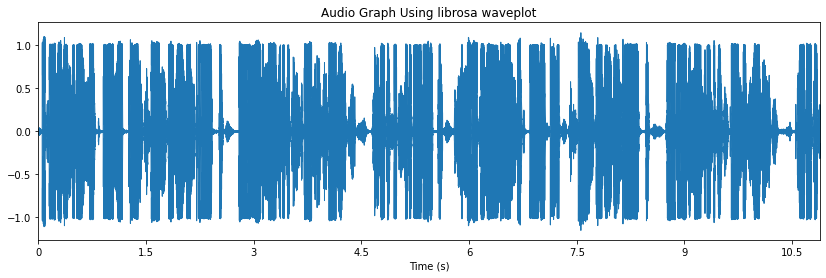

In [48]:
#librosa로 오디오 출력 뽑기
plt.figure()
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Audio Graph Using librosa waveplot')
'''
 y:np.ndarray [shape=(n,) or (2,n)]
 sr:sampling rate of y
 max_points:Maximum number of time-points to plot
 x_axis:str or None, ‘time’, 's'(as seconds), 'ms', etc. 
 max_sr:Maximum sampling rate for the visualization(max_sr > 0)
'''
librosa.display.waveplot(y=y, sr=22050, max_points=50000.0, x_axis='s',offset=0.0, max_sr=1000)


## FBANK

-   Why use Decibel to display data ?  
 http://digital.ni.com/public.nsf/allkb/8A93302DFBA0654D86256F32000C9CCB

In [57]:
# FBANK 적용
'''
 :param samplerate : the samplerate of the signal we are working with.
 :param winlen : the length of the analysis window in seconds. Default is 0.025s
 :param winstep : the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
 :param nfft : the FFT size. Default is 512.
 :param winfunc : the analysis window to apply to each frame. (hamming window)
 :param preemph: apply preemphasis filter with preemph as coefficient. 0 is no filter. 
                 Default is 0.97. (고주파 증폭, 일반적으로 α는 0.95 또는 0.97)

 :returns
 filter_banks : a numpy array of size (NUMFRAMES by nfilt) containing features. Each row holds 1 feature vector. 
 energies : value is the energy in each frame (total energy, unwindowed)
'''


filter_banks, energies = fbank(y, samplerate=sr, winlen=0.025, winstep=0.01, nfilt=40, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, winfunc=np.hamming)


# dB = 10 log^10 (Power Ratio) = 20 log^10 (Voltage Ratio)
# Linear Scale은 그들이 가지고 있는 Amplitude를 그대로 나타내는 것이고,
# 반면에 Decibel Scale은 Linear Scale을 Log Scale로 변환 시킨것이다.

filter_banks_dB = librosa.power_to_db(filter_banks)
# filter_banks_dB = 20 * np.log10(np.maximum(filter_banks, 1e-5)) #dB 단위로 표시하기 위함
feature = (filter_banks_dB - np.mean(filter_banks_dB, axis=0)) # normalize, 모든 프레임에서 각 계수의 평균을 뺀다.


print(feature)


[[-15.06006465 -18.66579884 -31.82489214 ... -19.33253871 -16.02283204
  -15.85976842]
 [-15.06006465 -16.88904296 -30.90275354 ... -17.76808887 -13.72217907
  -10.63184153]
 [-15.06006465 -17.69400141 -27.68489495 ... -16.83700577  -9.4642368
   -8.46729352]
 ...
 [ -4.09878104   1.30312787 -12.86700992 ...   7.88643519   7.76683033
    7.01687873]
 [-11.12131716   0.38865792  -7.62403584 ...  15.22334765  14.57118286
   15.03488598]
 [ 12.81557962  11.9908225  -10.89831399 ...  15.62815971  17.39036124
   22.27343976]]


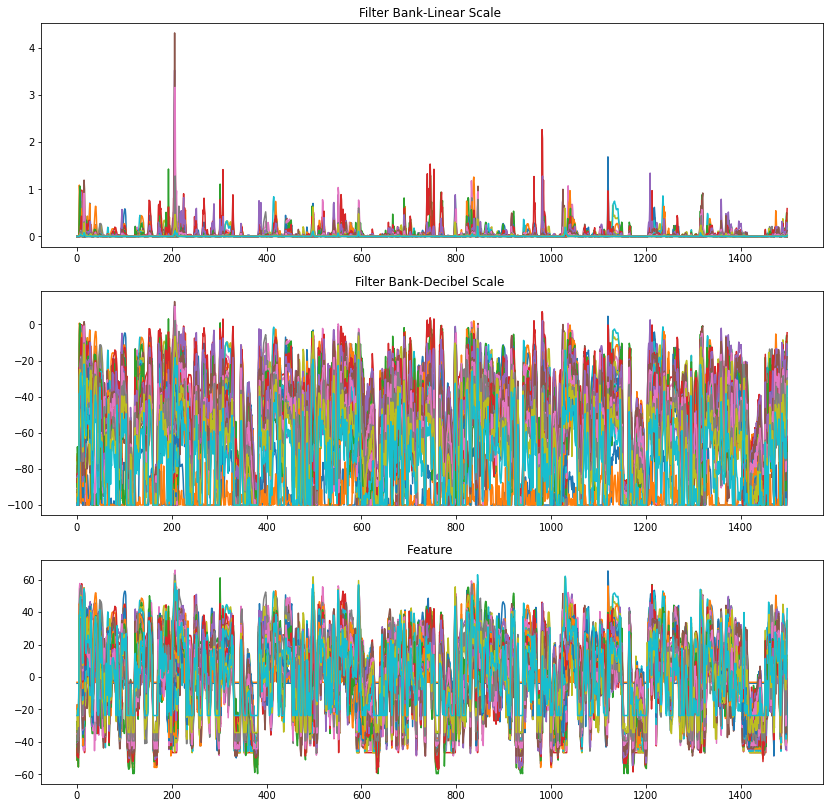

In [16]:
plt.rcParams["figure.figsize"] = (14,14)
plt.subplot(3,1,1)
plt.title('Filter Bank-Linear Scale ')
plt.plot(filter_banks)

plt.subplot(3,1,2)
plt.title('Filter Bank-Decibel Scale ')
plt.plot(filter_banks_dB)

plt.subplot(3,1,3)
plt.title('Feature ')
plt.plot(feature)

plt.show()

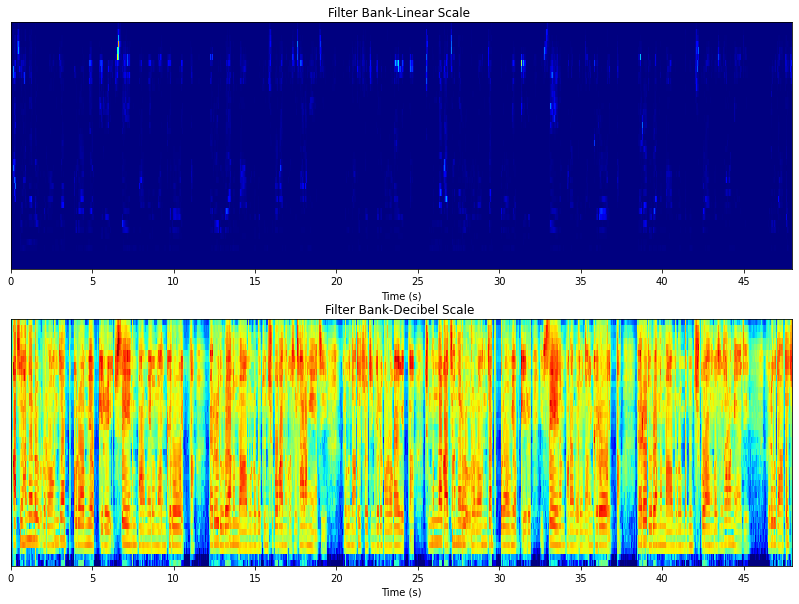

In [58]:
plt.rcParams["figure.figsize"] = (14,10)
plt.subplot(2,1,1)
plt.title('Filter Bank-Linear Scale ')
librosa.display.specshow(filter_banks.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.subplot(2,1,2)
plt.title('Filter Bank-Decibel Scale ')
librosa.display.specshow(filter_banks_dB.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)

plt.show()


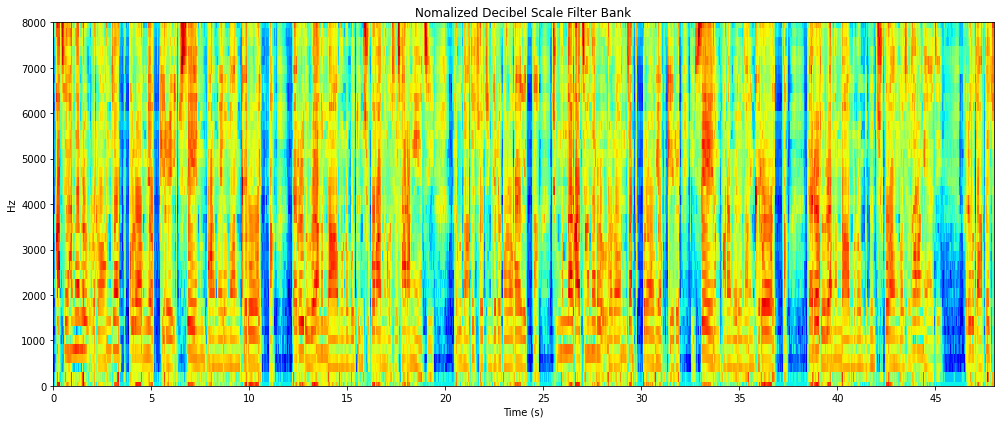

In [60]:
librosa.display.specshow(feature.T, x_coords=None, y_coords=None, x_axis='s', y_axis='linear', sr=sr, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12,cmap=cm.jet)
plt.rcParams["figure.figsize"] = (14,6)
plt.title('Nomalized Decibel Scale Filter Bank')
plt.tight_layout()
plt.show()

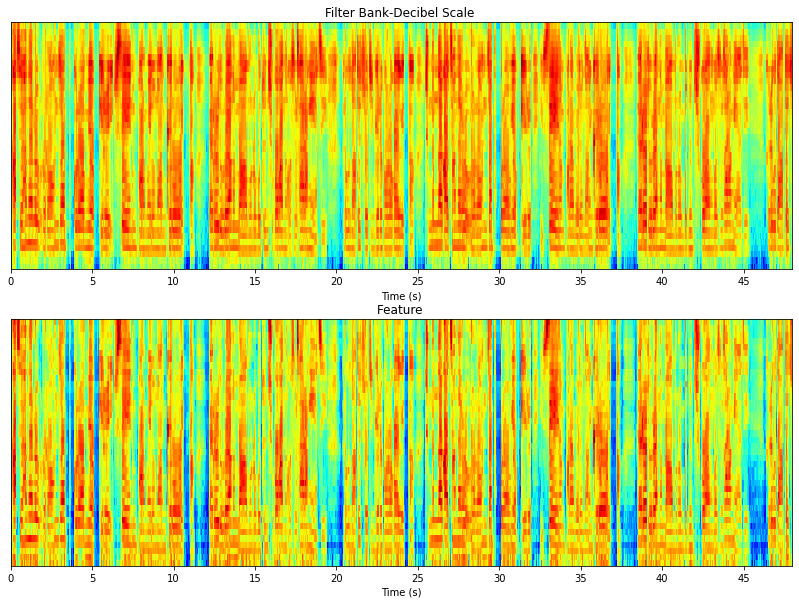

In [61]:
filter_banks_ofLogFbank= logfbank(y, samplerate=sr, winlen=0.025, winstep=0.01, nfilt=40, nfft=512, lowfreq=0, highfreq=None, preemph=0.97)
normalized_feature_ofLogFbank = (filter_banks_ofLogFbank - np.mean(filter_banks_ofLogFbank, axis=0)) # normalize, 모든 프레임에서 각 계수의 평균을 뺀다.


plt.rcParams["figure.figsize"] = (14,10)
plt.subplot(2,1,1)
plt.title('Filter Bank-Decibel Scale ')
librosa.display.specshow(filter_banks_ofLogFbank.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.subplot(2,1,2)
plt.title('Feature ')
librosa.display.specshow(normalized_feature_ofLogFbank.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.show()

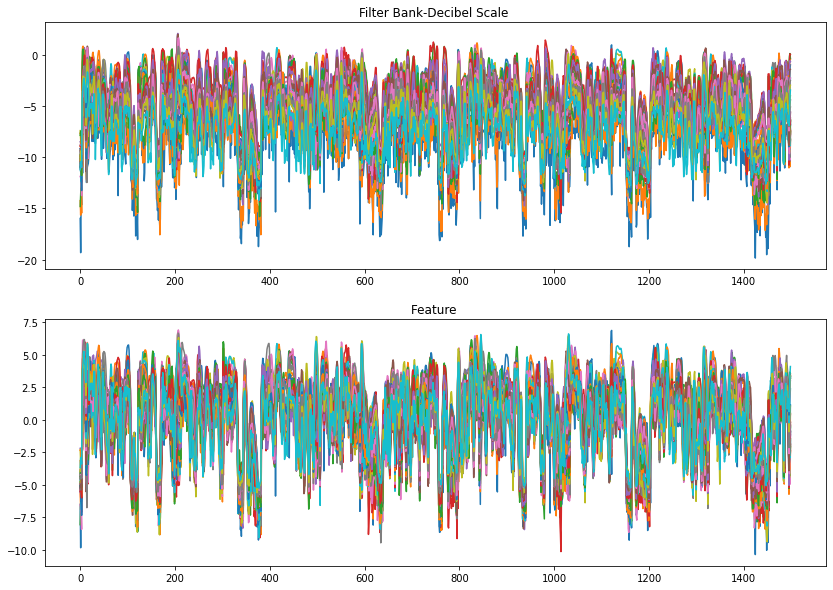

In [62]:
plt.rcParams["figure.figsize"] = (14,10)
plt.subplot(2,1,1)
plt.title('Filter Bank-Decibel Scale ')
plt.plot(filter_banks_ofLogFbank)

plt.subplot(2,1,2)
plt.title('Feature ')
plt.plot(normalized_feature_ofLogFbank)

plt.show()



### 참고: Dynamic features (delta)  

   
-  **Delta(and delta-delta) features**   
The introduction of these features by Furui was the first successful attempt to model the acoustic dynamics of th speech signal, and these features were used to characterize the time trajectories of a variety of acoustic parameters.
The delta features correspond to the slope (or velocity) and the delta-delta features to the curvature (or acceleration) associated with a specific parameter trajectory.
The trajectories were based on cepstral coefficients in Furui's original implementation, but have since been applied by others to other spectral representations.
Such dynamic features ar used in virtually all state-of-the-art ASR(Automatic Speech Recognition) systems as an important extension of frame-by-frame short term features.
Their success may be at least partially attributed to the fact that dynamic features contribute new information pertaining to the context of each frame that was unavailable to the pattern classification component of an ASR system with purely static features.

Source : "Speech Processing in the Auditory System" - Steven Greenberg, William A. Ainsworth, Richard R.

In [33]:
def get_fbank_feature(wavsignal, fs):
    feat_fbank = logfbank(wavsignal, fs, nfilt=40)
    
    # Compute delta features from a feature vector sequence.
    feat_fbank_d = delta(feat_fbank, 2)
    feat_fbank_dd = delta(feat_fbank_d, 2)
    
    wav_feature = np.column_stack((feat_fbank, feat_fbank_d, feat_fbank_dd))
    return wav_feature, feat_fbank, feat_fbank_d, feat_fbank_dd

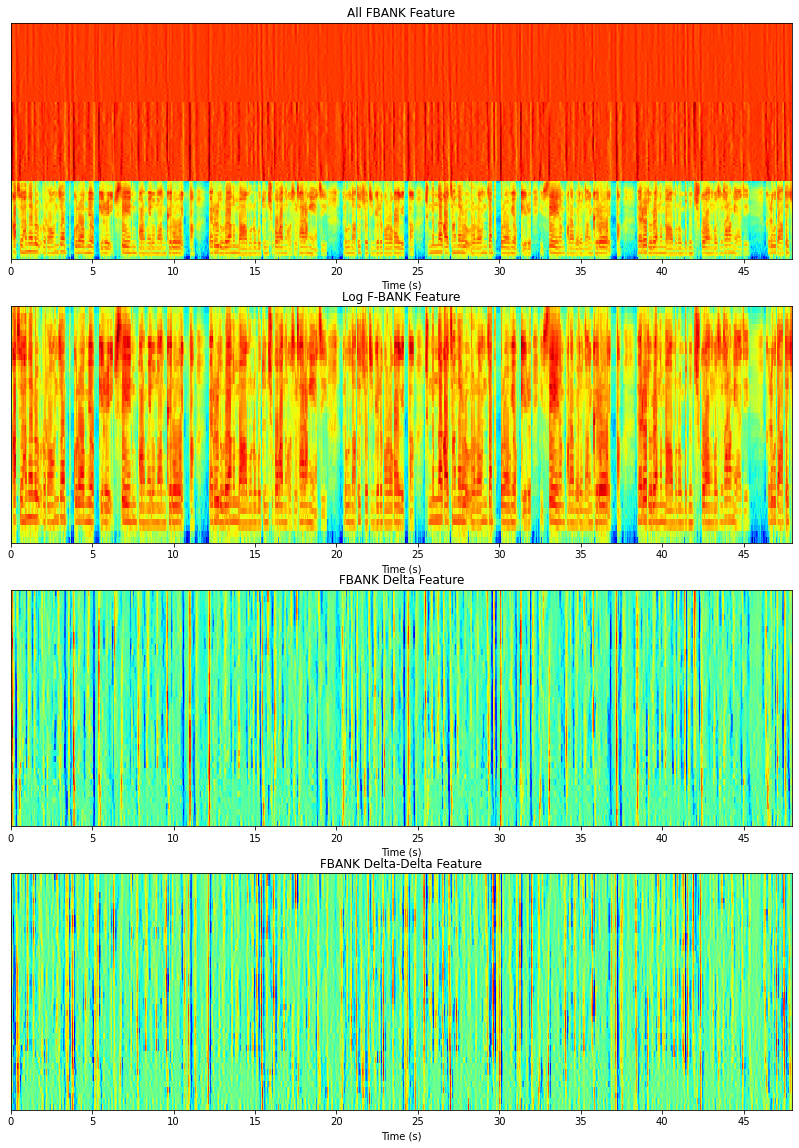

In [63]:
wav_feature, fbank_feature, fbank_feature_d, fbank_feature_dd = get_fbank_feature(y, sr)
plt.rcParams["figure.figsize"] = (14,20)
plt.subplot(4,1,1)
plt.title('All FBANK Feature')
librosa.display.specshow(wav_feature.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.subplot(4,1,2)
plt.title('Log F-BANK Feature')
librosa.display.specshow(fbank_feature.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.subplot(4,1,3)
plt.title('FBANK Delta Feature')
librosa.display.specshow(fbank_feature_d.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)


plt.subplot(4,1,4)
plt.title('FBANK Delta-Delta Feature')
librosa.display.specshow(fbank_feature_dd.T, sr=sr, hop_length=512, x_axis='s', cmap=cm.jet)

plt.show()

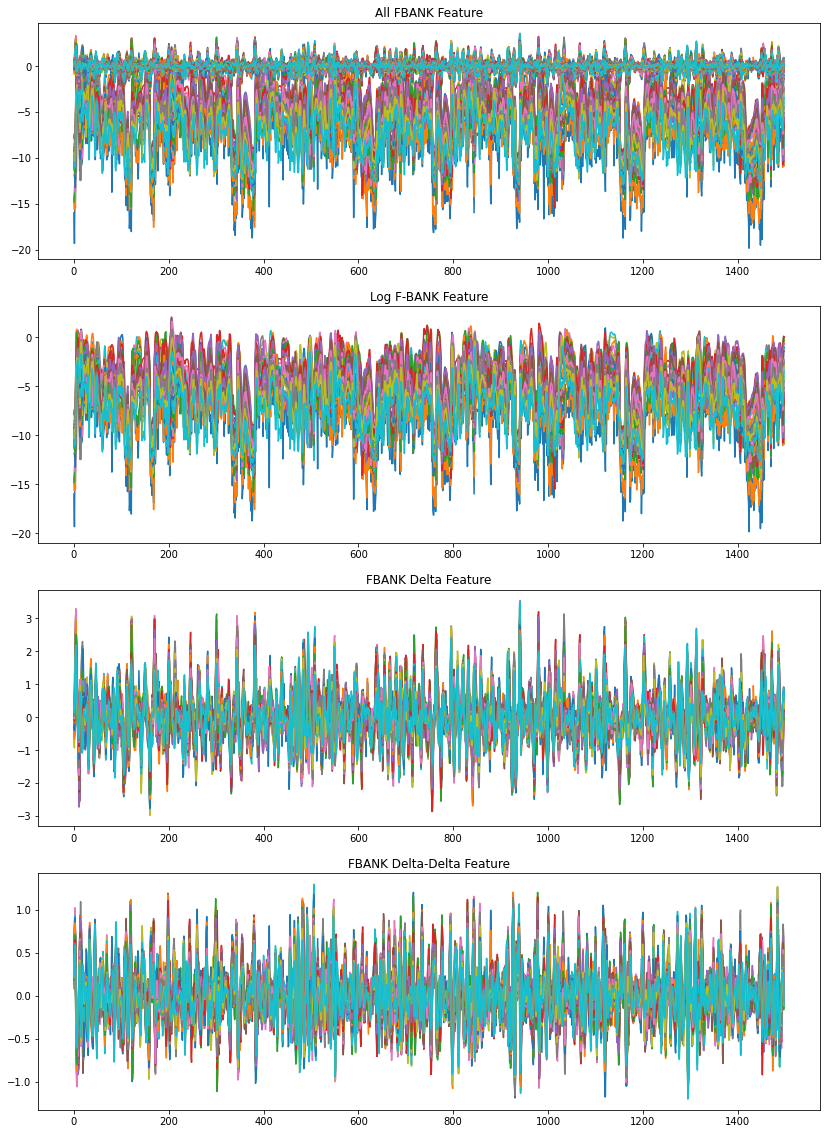

In [64]:
plt.rcParams["figure.figsize"] = (14,20)
plt.subplot(4,1,1)
plt.title('All FBANK Feature')
plt.plot(wav_feature)

plt.subplot(4,1,2)
plt.title('Log F-BANK Feature')
plt.plot(fbank_feature)


plt.subplot(4,1,3)
plt.title('FBANK Delta Feature')
plt.plot(fbank_feature_d)


plt.subplot(4,1,4)
plt.title('FBANK Delta-Delta Feature')
plt.plot(fbank_feature_dd)

plt.show()